# Heart_Disease_Dataset

Each variable can contribute to assessing the likelihood of heart disease. Here's how they are generally related:

1. Age

Impact: Risk of heart disease increases with age. Older individuals are more likely to have accumulated risk factors such as atherosclerosis and high blood pressure.

2. Sex

Impact: Men generally have a higher risk of heart disease compared to pre-menopausal women, but this risk becomes more comparable after menopause.

3. Chest Pain Type (0–3)

Impact:
Type 0: Asymptomatic, may still indicate silent ischemia.
Type 1: Typical angina, often associated with higher heart disease risk.
Type 2: Atypical angina, could also signal underlying issues.
Type 3: Non-anginal pain, less strongly associated with heart disease.

4. Resting Blood Pressure

Impact: High resting blood pressure is a risk factor as it can lead to hypertrophy of the heart and damage to blood vessels, increasing the likelihood of heart disease.

5. Serum Cholesterol

Impact: High cholesterol levels, especially LDL (bad cholesterol), are associated with the buildup of plaques in arteries (atherosclerosis), a significant risk factor for heart disease.

6. Fasting Blood Sugar

Impact: Elevated fasting blood sugar is a sign of diabetes, which accelerates vascular damage and increases the risk of heart disease.

7. Resting Electrocardiographic Results (0–2)

Impact:
0: Normal, less risk.
1: ST-T wave abnormalities may indicate ischemia or heart stress.
2: Left ventricular hypertrophy signals prolonged high blood pressure or other cardiac strain, increasing heart disease risk.

8. Maximum Heart Rate Achieved

Impact: Lower-than-expected maximum heart rate during exercise can indicate poor heart function or significant heart disease.

9. Exercise-Induced Angina

Impact: Chest pain induced by exercise is a strong indicator of myocardial ischemia, increasing the likelihood of heart disease.

10. Oldpeak (ST Depression Induced by Exercise)

Impact: Greater ST depression suggests more severe myocardial ischemia, a clear risk marker for heart disease.

11. Slope of the Peak Exercise ST Segment (0–2)

Impact:
0: Downsloping, associated with worse outcomes and ischemia.
1: Flat slope, moderate concern.
2: Upsloping, less risk compared to other patterns.

12. Number of Major Vessels Colored by Fluoroscopy (0–3)

Impact: A higher number of vessels with significant obstruction (colored) indicates advanced coronary artery disease and greater risk.

13. Thalassemia (0–2)

Impact:
0: Normal, no added risk.
1: Fixed defect, suggests prior myocardial infarction or scar tissue, increasing risk.
2: Reversible defect, suggests myocardial ischemia, also increasing risk.

14. Target (Presence of Heart Disease)

Impact: The outcome variable indicates whether the individual is diagnosed with heart disease based on the above risk factors.

# Importing Libraries

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [43]:
df = pd.read_csv("C:\\Users\\kiran\\Downloads\\heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Inspecting Data

In [44]:
df.shape

(1025, 14)

In [45]:
df.size

14350

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [48]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


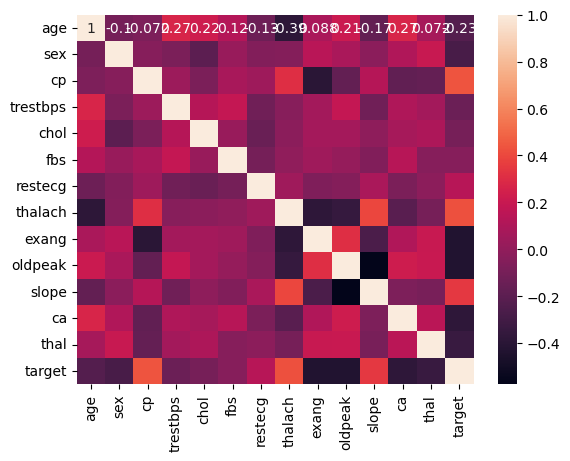

In [49]:
hm = sns.heatmap(data = df.corr(), annot = True)
plt.show()

# Checking Duplicates 

In [50]:
duplicated_rows = df.duplicated()

In [51]:
duplicated_rows.sum() # Since there are huge dupliate values , decided to keep it.

723

# Checking Missing Values

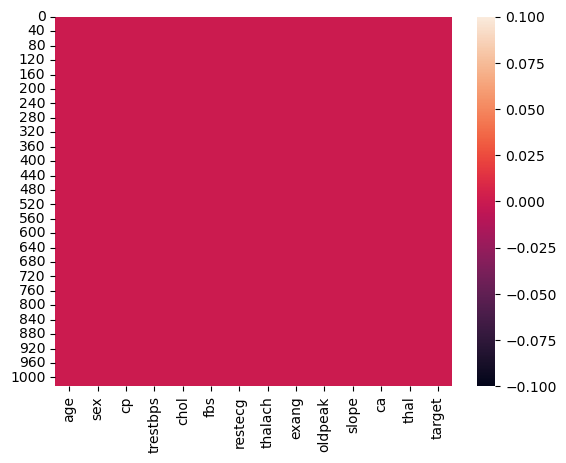

In [52]:
sns.heatmap(df.isna())
plt.show()

In [53]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
# We can see that there is no missing values in the data.

## Distribution of variables

### Check histograms 

In [55]:
df_cols = df.columns
df_cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

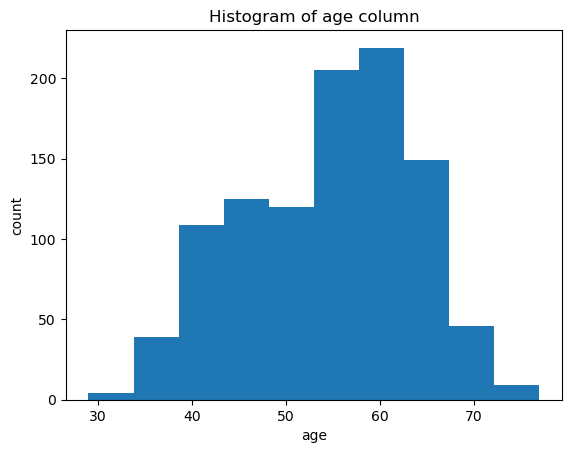

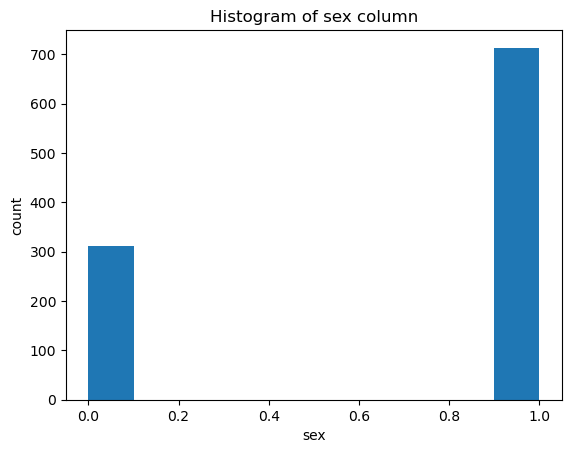

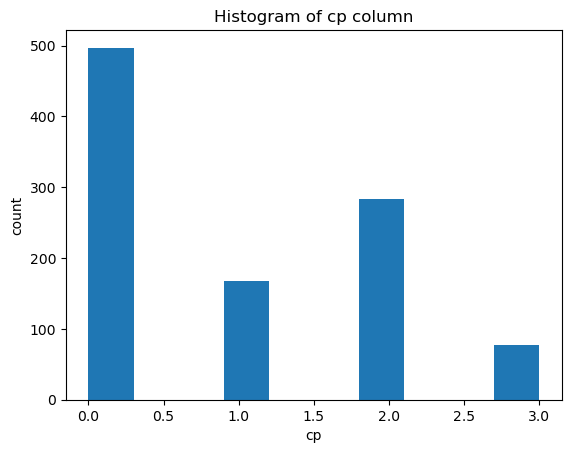

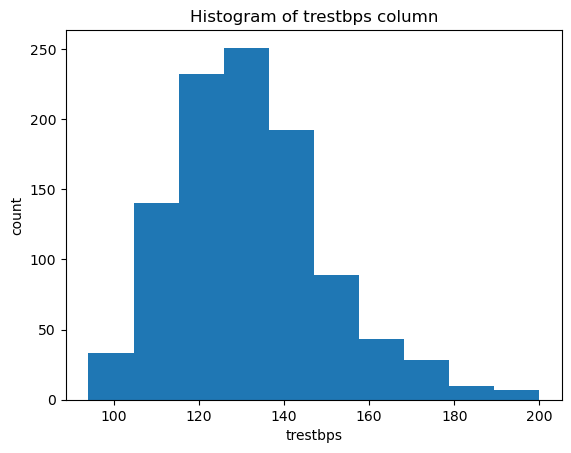

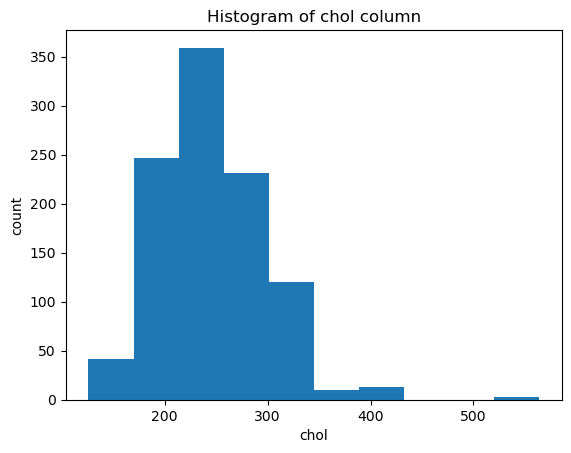

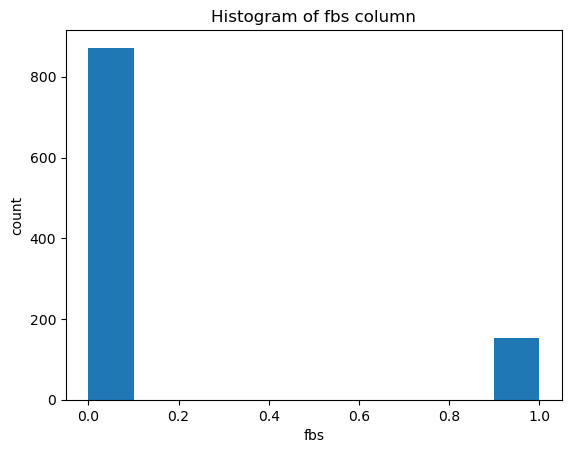

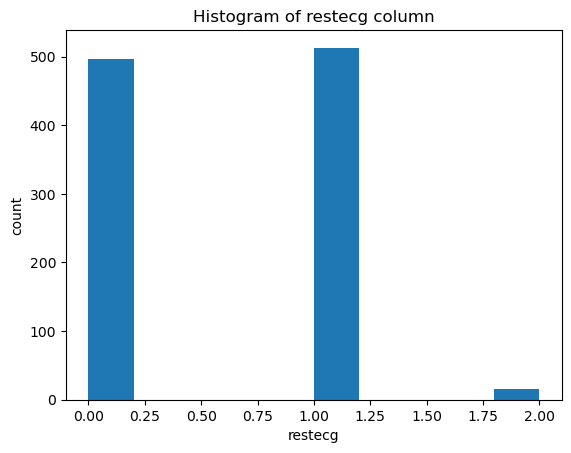

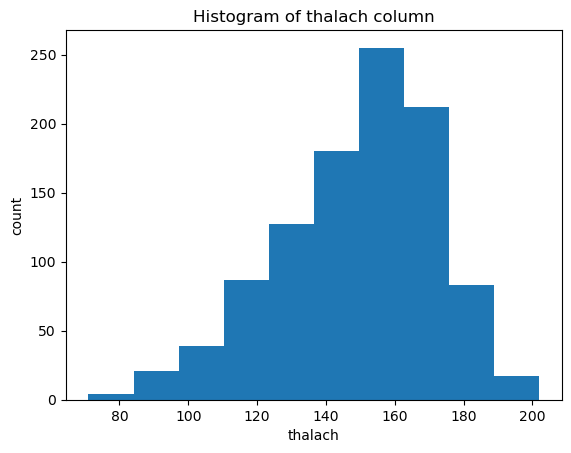

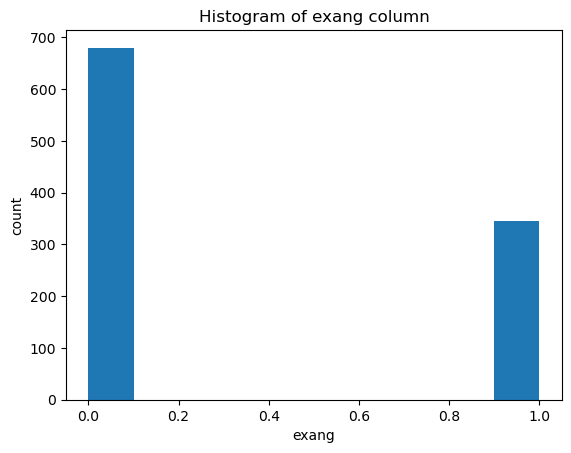

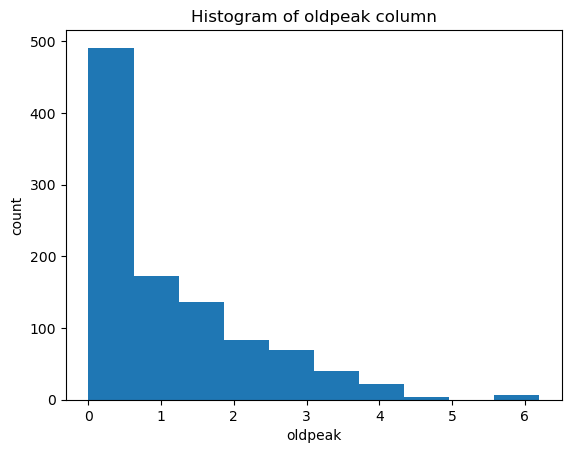

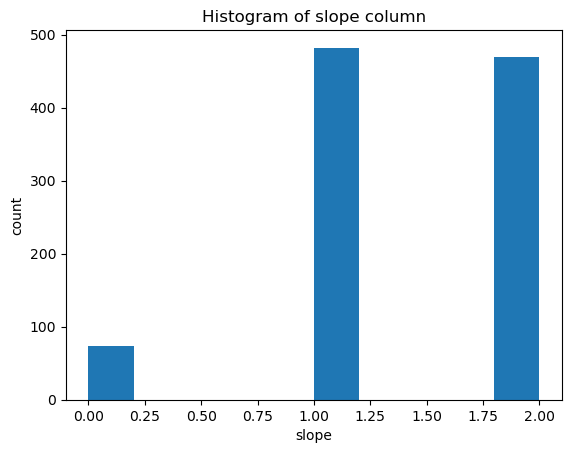

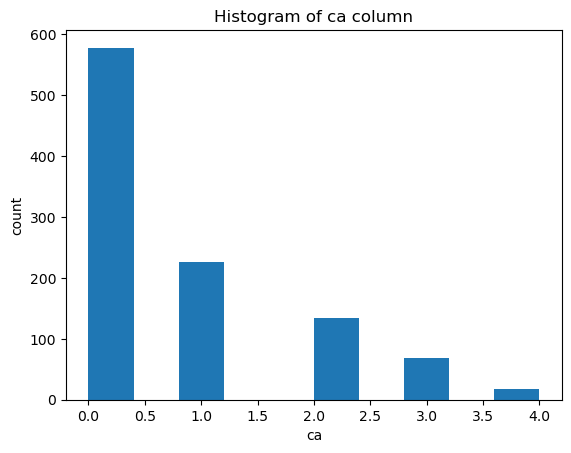

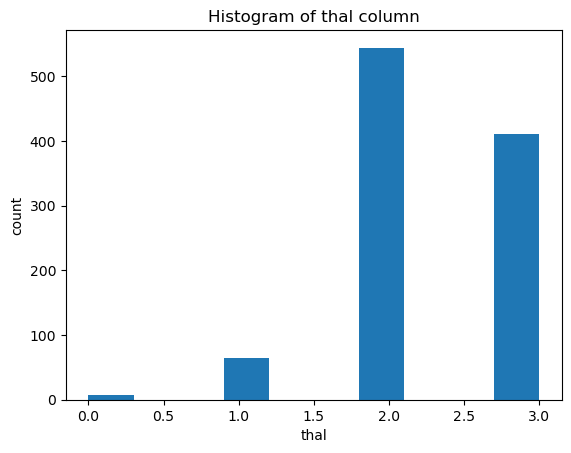

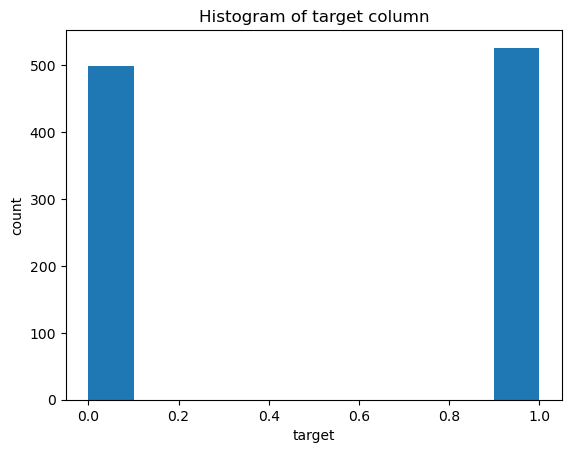

In [56]:


for col in df_cols:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()
    

# Outlier Handling

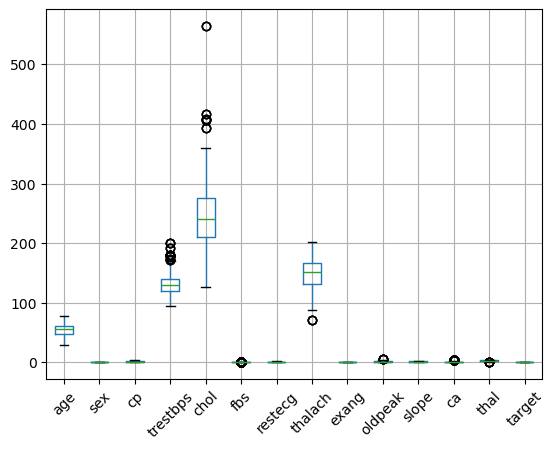

In [57]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()


In [58]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [59]:
for col in df_cols:
    df[col] = remove_outliers(df, col)

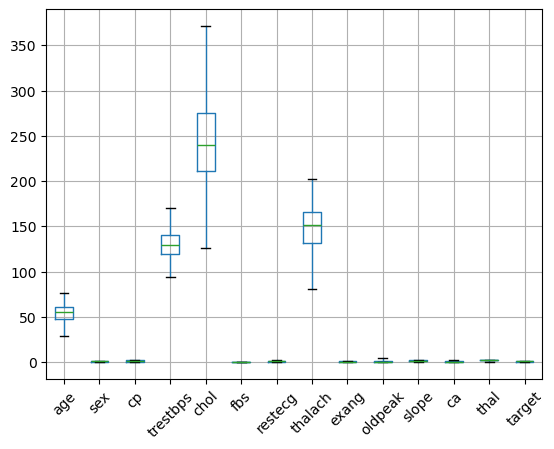

In [60]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

# Feature Encoding

In [61]:
# One hot Encoding of chest pain type, resting electrocardiographic results, thal columns
df = pd.get_dummies(df,columns=['cp','restecg','thal'],dtype= int,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,125,212,0,168,0,1.0,2,2.0,0,0,0,0,1,0,0,0,1
1,53,1,140,203,0,155,1,3.1,0,0.0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0.0,0,0,0,0,1,0,0,0,1
3,61,1,148,203,0,161,0,0.0,2,1.0,0,0,0,0,1,0,0,0,1
4,62,0,138,294,0,106,0,1.9,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,2,0.0,1,1,0,0,1,0,0,1,0
1021,60,1,125,258,0,141,1,2.8,1,1.0,0,0,0,0,0,0,0,0,1
1022,47,1,110,275,0,118,1,1.0,1,1.0,0,0,0,0,0,0,0,1,0
1023,50,0,110,254,0,159,0,0.0,2,0.0,1,0,0,0,0,0,0,1,0


# Feature Scaling

In [62]:
num_df = df.copy()
num_df1 = df.copy()

In [63]:
# min max scaling for regression model
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
colms1 = ['trestbps','thalach','oldpeak']
num_df1[colms1] = min_scaler.fit_transform(num_df1[colms1])
num_df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,0.407895,212,0,0.719008,0,0.222222,2,2.0,0,0,0,0,1,0,0,0,1
1,53,1,0.605263,203,0,0.611570,1,0.688889,0,0.0,0,0,0,0,0,0,0,0,1
2,70,1,0.671053,174,0,0.363636,1,0.577778,0,0.0,0,0,0,0,1,0,0,0,1
3,61,1,0.710526,203,0,0.661157,0,0.000000,2,1.0,0,0,0,0,1,0,0,0,1
4,62,0,0.578947,294,0,0.206612,0,0.422222,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,0.605263,221,0,0.685950,1,0.000000,2,0.0,1,1,0,0,1,0,0,1,0
1021,60,1,0.407895,258,0,0.495868,1,0.622222,1,1.0,0,0,0,0,0,0,0,0,1
1022,47,1,0.210526,275,0,0.305785,1,0.222222,1,1.0,0,0,0,0,0,0,0,1,0
1023,50,0,0.210526,254,0,0.644628,0,0.000000,2,0.0,1,0,0,0,0,0,0,1,0


In [64]:
# min max scaling for classification model
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()
colms = ['trestbps','chol','thalach','oldpeak']
num_df[colms] = min_scaler.fit_transform(num_df[colms])
num_df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1.0,thal_2.0,thal_3.0
0,52,1,0.407895,0.351020,0,0.719008,0,0.222222,2,2.0,0,0,0,0,1,0,0,0,1
1,53,1,0.605263,0.314286,0,0.611570,1,0.688889,0,0.0,0,0,0,0,0,0,0,0,1
2,70,1,0.671053,0.195918,0,0.363636,1,0.577778,0,0.0,0,0,0,0,1,0,0,0,1
3,61,1,0.710526,0.314286,0,0.661157,0,0.000000,2,1.0,0,0,0,0,1,0,0,0,1
4,62,0,0.578947,0.685714,0,0.206612,0,0.422222,1,2.5,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,0.605263,0.387755,0,0.685950,1,0.000000,2,0.0,1,1,0,0,1,0,0,1,0
1021,60,1,0.407895,0.538776,0,0.495868,1,0.622222,1,1.0,0,0,0,0,0,0,0,0,1
1022,47,1,0.210526,0.608163,0,0.305785,1,0.222222,1,1.0,0,0,0,0,0,0,0,1,0
1023,50,0,0.210526,0.522449,0,0.644628,0,0.000000,2,0.0,1,0,0,0,0,0,0,1,0


# Checking Relation Between Target and Features

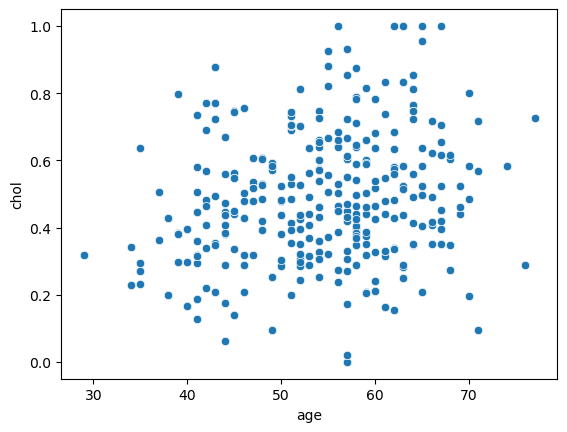

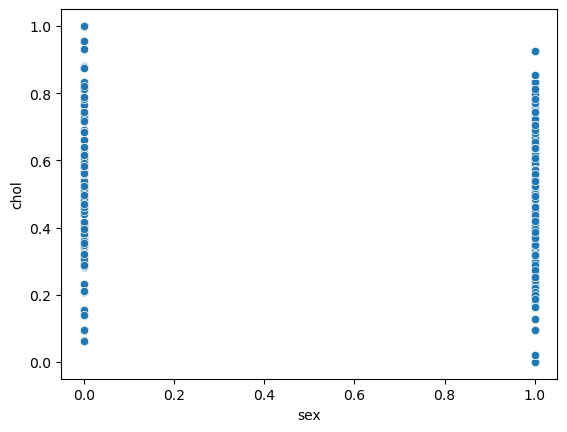

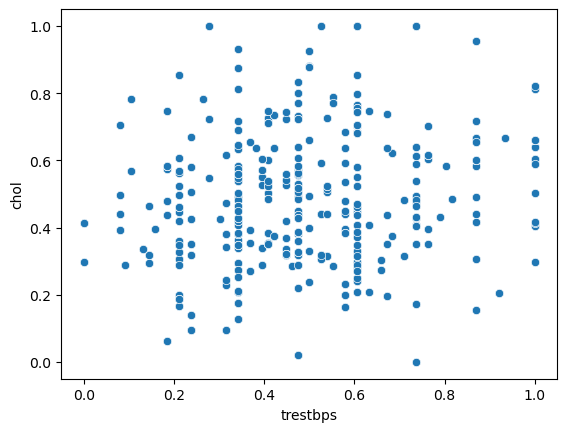

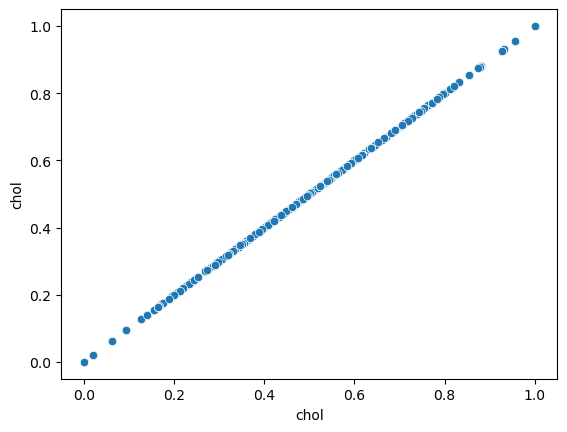

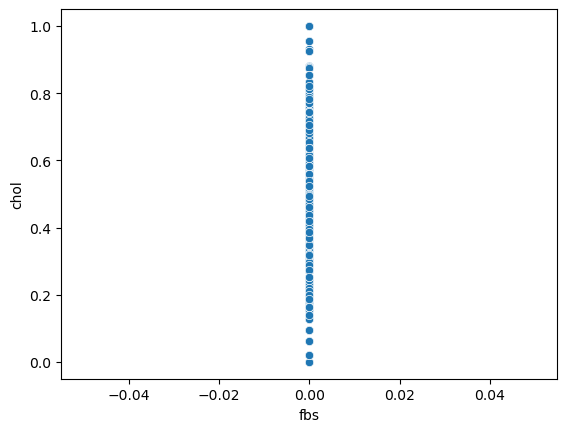

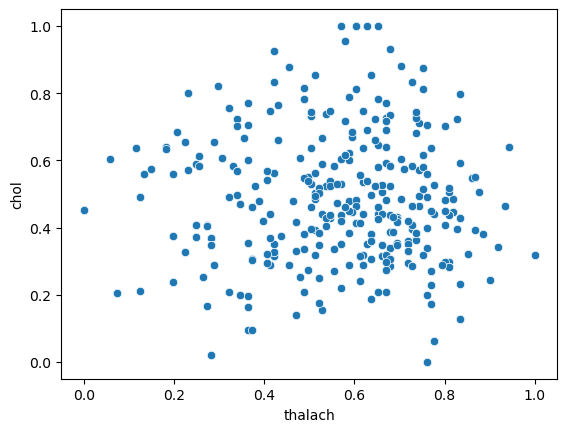

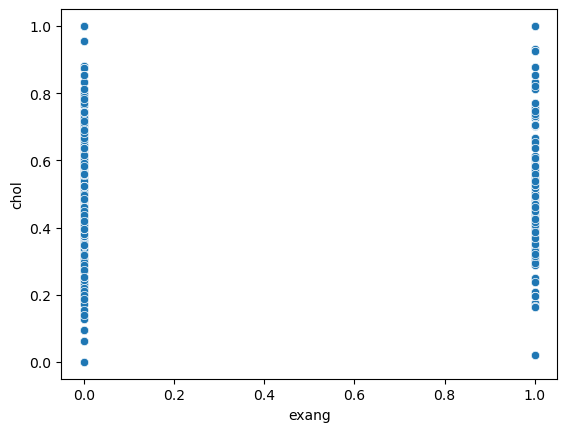

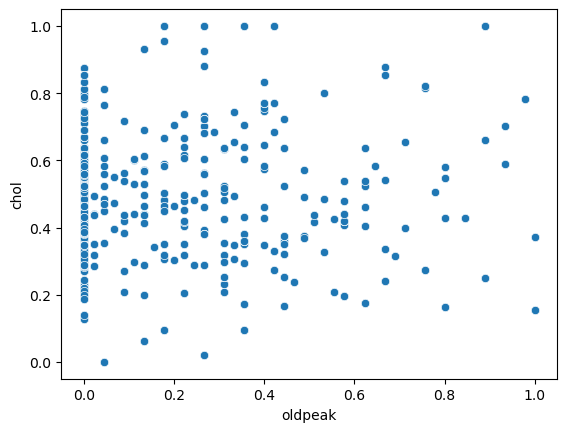

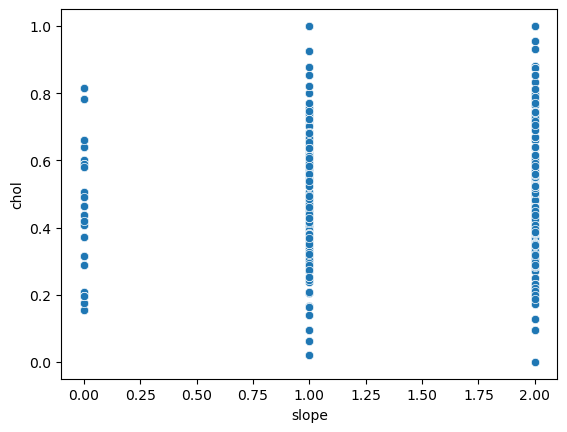

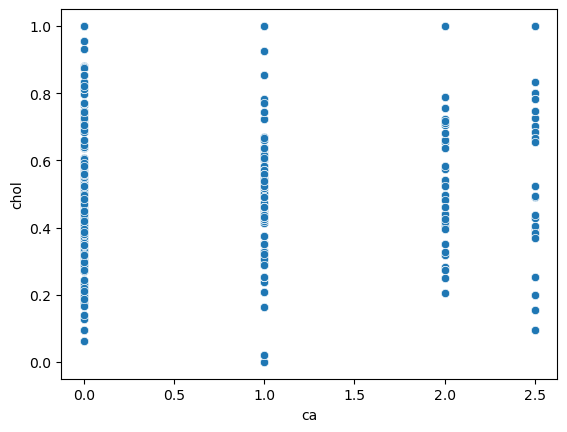

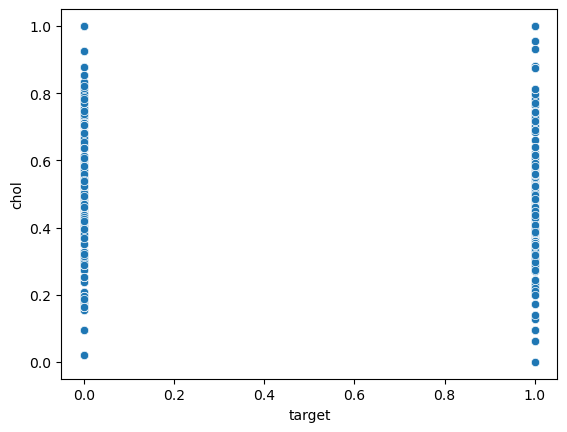

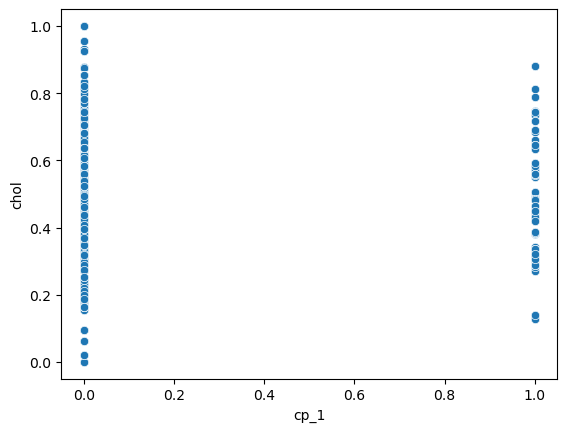

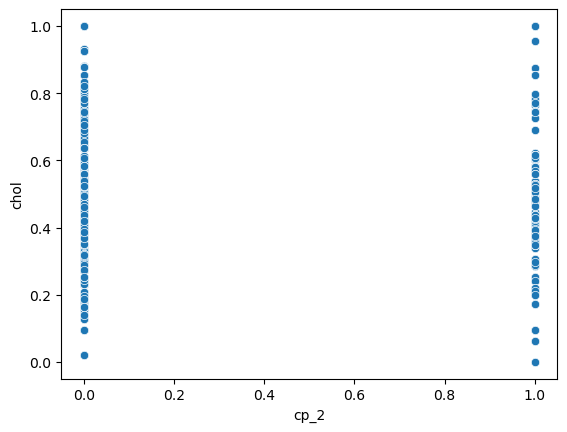

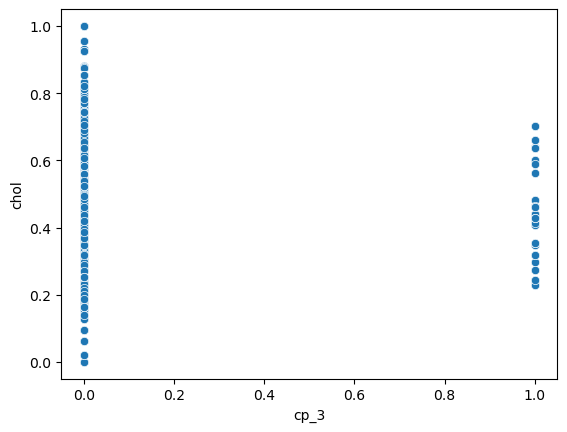

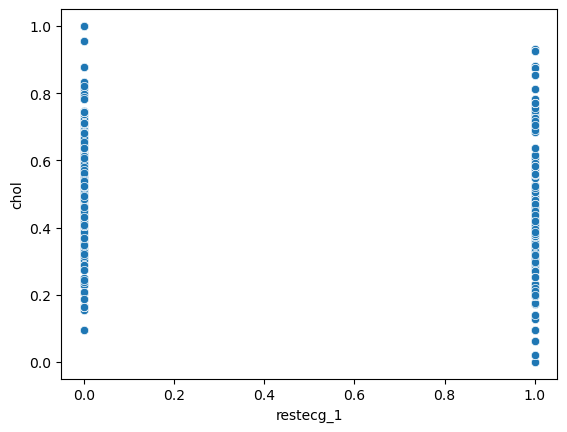

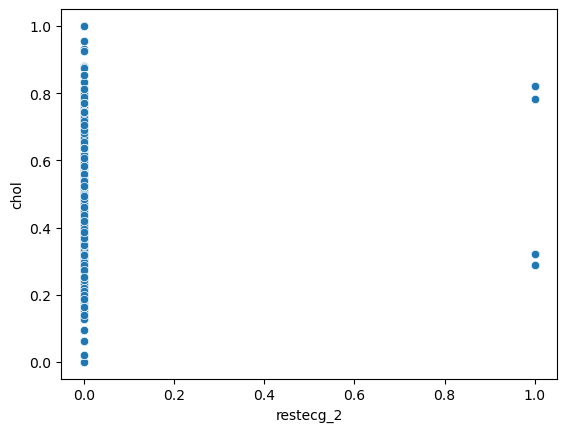

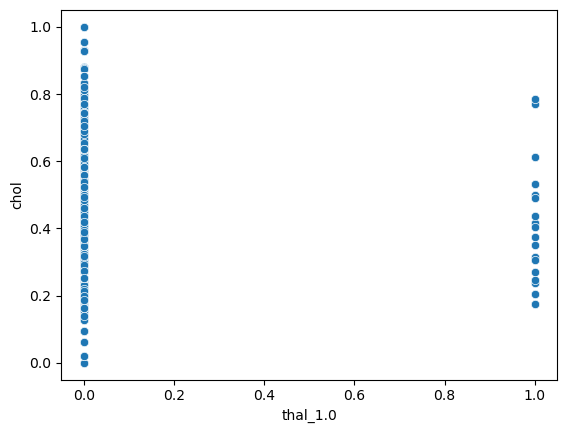

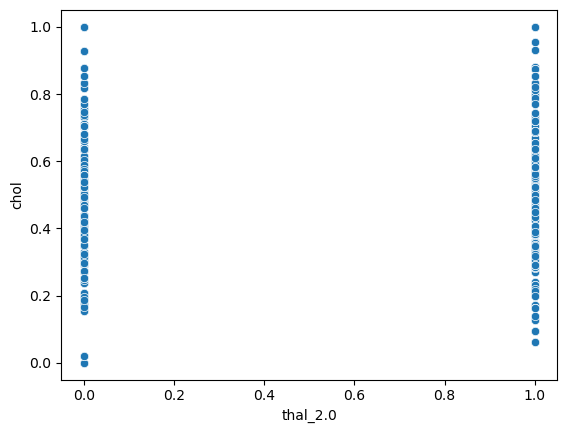

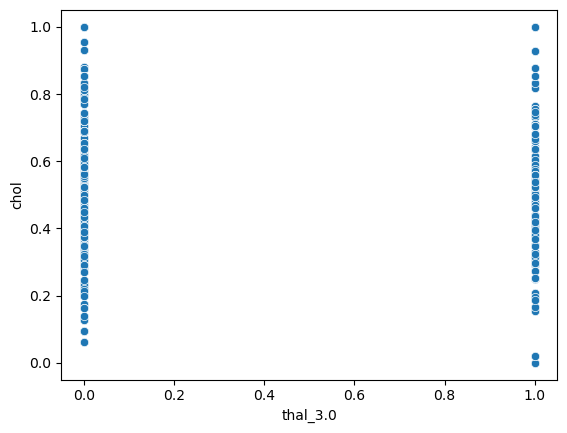

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
for feature in df.columns:
    sns.scatterplot(data= num_df,x=feature, y='chol')
    plt.show()

# Linear Regression

## Seperate Features and Labels

In [66]:
y = num_df["chol"]
X = num_df.drop("chol", axis=1)

## Train test split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(X_train,y_train)
y_pred = reg_line.predict(X_test)

In [70]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(" Mean squared error:",mse)
print(" R2 Score:",r2)
print(" Mean Absolute error:",mae)

 Mean squared error: 0.030453675608900693
 R2 Score: 0.1621190006754044
 Mean Absolute error: 0.13624449817964357


# Classsification

In [71]:
# Seperate features and target
y = num_df1["target"]
X = num_df1.drop("target", axis=1)

In [72]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Logistic Regression

In [73]:
from sklearn.datasets import make_classification

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

C:\Users\kiran\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
print(model.coef_)
print(model.intercept_)

[[ 0.00574779 -1.30153652 -0.85164004 -0.00703899  0.          1.9048529
  -0.80729563 -1.49392815  0.60867339 -1.10349073  1.14678938  1.89033315
   1.71849537  0.56224142 -0.3285648   0.69723645  0.86522589 -0.59947601]]
[0.73344367]


In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print ("precision_score:" , precision_score(y_pred,y_test,average='weighted'))
print ("recall_score:" , recall_score(y_pred,y_test,average='weighted'))
print ("f1_score:" , f1_score(y_pred,y_test,average='weighted'))
print ("accuracy_score:" , accuracy_score(y_pred,y_test))


precision_score: 0.838513356562137
recall_score: 0.8341463414634146
f1_score: 0.8343437862950058
accuracy_score: 0.8341463414634146


## KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print ("precision_score:" , precision_score(y_pred,y_test,average='weighted'))
print ("recall_score:" , recall_score(y_pred,y_test,average='weighted'))
print ("f1_score:" , f1_score(y_pred,y_test,average='weighted'))
print ("accuracy_score:" , accuracy_score(y_pred,y_test))


precision_score: 0.8803902439024391
recall_score: 0.8731707317073171
f1_score: 0.8737906562504383
accuracy_score: 0.8731707317073171


## Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print ("precision_score:" , precision_score(y_pred,y_test,average='weighted'))
print ("recall_score:" , recall_score(y_pred,y_test,average='weighted'))
print ("f1_score:" , f1_score(y_pred,y_test,average='weighted'))
print ("accuracy_score:" , accuracy_score(y_pred,y_test))


precision_score: 0.838513356562137
recall_score: 0.8341463414634146
f1_score: 0.8343437862950058
accuracy_score: 0.8341463414634146
